<p style="background:linear-gradient(135deg,#08659f,#05466e);font-family:'Poppins',sans-serif;color:#F5F5F5;font-size:1.5rem;text-align:center;border-radius:25px;padding:12px 20px;box-shadow:0 4px 15px rgba(0,0,0,0.2);letter-spacing:1px;text-transform:uppercase;">Car Price Prediction</p>


![d](ai_generated_photo_turbo_az.png)


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">

<p style="background:linear-gradient(135deg,#08659f,#05466e);font-family:'Poppins',sans-serif;color:#F5F5F5;font-size:1.5rem;text-align:center;border-radius:25px;padding:12px 20px;box-shadow:0 4px 15px rgba(0,0,0,0.2);letter-spacing:1px;text-transform:uppercase;">Table of contents</p>
    
* [1. Importing Libraries](#1)
    
* [2. Importing Data](#2)
 
* [3. Data Cleaning](#3)
    * [3.1 Fixing Inconsistencies](###3.1)
    * [3.2 Handling with Missing Data](#3.2)
    * [3.3 Cleaning Duplicates](#3.3)
    

 <a id="1"></a>
# <p style="background:linear-gradient(135deg,#08659f,#05466e);font-family:'Poppins',sans-serif;color:#F5F5F5;font-size:1.5rem;text-align:center;border-radius:25px;padding:12px 20px;box-shadow:0 4px 15px rgba(0,0,0,0.2);letter-spacing:1px;text-transform:uppercase;"> Importing Libraries</p>


In [666]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

 <a id="2"></a>
# <p style="background:linear-gradient(135deg,#08659f,#05466e);font-family:'Poppins',sans-serif;color:#F5F5F5;font-size:1.5rem;text-align:center;border-radius:25px;padding:12px 20px;box-shadow:0 4px 15px rgba(0,0,0,0.2);letter-spacing:1px;text-transform:uppercase;">Importing data</p>


In [531]:
df = pd.read_excel('turbo_az_dataset.xlsx',names = ['City', 'Price', 'Make', 'Model', 'Year', 'Body Type', 'Color', 'Engine', 'Kilometrage', 'Transmission', 'Drivetrain', 'Is_New', 'Number_of_Seats', 'Condition', 'Market', 'Damaged', 'Owners'])
df.head()

,City,Price,Make,Model,Year,Body Type,Color,Engine,Kilometrage,Transmission,Drivetrain,Is_New,Number_of_Seats,Condition,Market,Damaged,Owners
0,Bərdə,8 500 AZN,GAZ,53,1992,Yük maşını,Yaş Asfalt,4.3 L / 150 a.g. / Benzin,500 000 km,Mexaniki (MT),Arxa,Xeyr,NaN,"Vuruğu yoxdur, rənglənməyib",NaN,NaN,NaN
1,Tovuz,8 500 AZN,Mercedes,C 180,1994,Sedan,Gümüşü,1.8 L / 122 a.g. / Benzin,596 890 km,Avtomat (AT),Arxa,Xeyr,5,"Vuruğu yoxdur, rənglənib",Amerika,NaN,NaN
2,Ağdaş,2 500 AZN,LADA (VAZ),2108,1989,"Hetçbek, 3 qapı",Sarı,1.5 L / 78 a.g. / Benzin,172 820 km,Mexaniki (MT),Ön,Xeyr,5,"Vuruğu var, rənglənib",NaN,NaN,NaN
3,Sumqayıt,28 900 AZN,BMW,528,2012,Sedan,Ağ,2.0 L / 245 a.g. / Benzin,152 410 km,Avtomat (AT),Arxa,Xeyr,5,"Vuruğu yoxdur, rənglənməyib",Amerika,NaN,NaN
4,Bakı,21 500 AZN,Hyundai,ix35,2012,"Offroader / SUV, 5 qapı",Ağ,2.0 L / 150 a.g. / Benzin,270 000 km,Avtomat (AT),Ön,Xeyr,5,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,NaN,NaN


In [532]:
df.shape

(20078, 17)

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20078 entries, 0 to 20077
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             20078 non-null  object
 1   Price            20078 non-null  object
 2   Make             20078 non-null  object
 3   Model            20078 non-null  object
 4   Year             20078 non-null  int64 
 5   Body Type        20078 non-null  object
 6   Color            20078 non-null  object
 7   Engine           20078 non-null  object
 8   Kilometrage      20078 non-null  object
 9   Transmission     20078 non-null  object
 10  Drivetrain       20078 non-null  object
 11  Is_New           20078 non-null  object
 12  Number_of_Seats  17893 non-null  object
 13  Condition        20077 non-null  object
 14  Market           16334 non-null  object
 15  Damaged          103 non-null    object
 16  Owners           8014 non-null   object
dtypes: int64(1), object(16)
memory 

 <a id="3"></a>
# <p style="background:linear-gradient(135deg,#08659f,#05466e);font-family:'Poppins',sans-serif;color:#F5F5F5;font-size:1.5rem;text-align:center;border-radius:25px;padding:12px 20px;box-shadow:0 4px 15px rgba(0,0,0,0.2);letter-spacing:1px;text-transform:uppercase;">Data Cleaning</p>


<a id="3.1"></a>

### 3.1 Fixing Inconsistencies

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20078 entries, 0 to 20077
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             20078 non-null  object
 1   Price            20078 non-null  object
 2   Make             20078 non-null  object
 3   Model            20078 non-null  object
 4   Year             20078 non-null  int64 
 5   Body Type        20078 non-null  object
 6   Color            20078 non-null  object
 7   Engine           20078 non-null  object
 8   Kilometrage      20078 non-null  object
 9   Transmission     20078 non-null  object
 10  Drivetrain       20078 non-null  object
 11  Is_New           20078 non-null  object
 12  Number_of_Seats  17893 non-null  object
 13  Condition        20077 non-null  object
 14  Market           16334 non-null  object
 15  Damaged          103 non-null    object
 16  Owners           8014 non-null   object
dtypes: int64(1), object(16)
memory 

Let's look for inconsistencies in dataset. We can clearly see that when some columns should be numeric but they are in object data type. Such as Price , Engine, Kilometrage, Number_of_Seats. Let's transform them to numeric columns first.

>`Price` column

In price  column some values are in different currencies. We need to bring them to a single currency and change the column to a numeric dtype.

In [540]:
df['Price']

0                     8 500 AZN
1                     8 500 AZN
2                     2 500 AZN
3                    28 900 AZN
4                    21 500 AZN
                  ...          
20073                14 300 AZN
20074                19 800 AZN
20075                34 000 AZN
20076    ≈ 86 360 AZN50 800 USD
20077                18 500 AZN
Name: Price, Length: 20078, dtype: object

In [541]:
# keep prices only in AZN currency
df['Price'] = df['Price'].str.split('AZN').str[0]

In [542]:
# removing any extra spaces and characters just to keep numbers
df['Price'] = df['Price'].str.replace(r'[^0-9]','', regex = True)
df['Price']= df['Price'].astype(int)
df['Price']

0         8500
1         8500
2         2500
3        28900
4        21500
         ...  
20073    14300
20074    19800
20075    34000
20076    86360
20077    18500
Name: Price, Length: 20078, dtype: int32

>`Engine` column

In [544]:
df['Engine']

0        4.3 L / 150 a.g. / Benzin
1        1.8 L / 122 a.g. / Benzin
2         1.5 L / 78 a.g. / Benzin
3        2.0 L / 245 a.g. / Benzin
4        2.0 L / 150 a.g. / Benzin
                   ...            
20073    1.8 L / 204 a.g. / Benzin
20074    1.5 L / 184 a.g. / Benzin
20075    1.6 L / 183 a.g. / Benzin
20076    1.6 L / 230 a.g. / Hibrid
20077    1.5 L / 160 a.g. / Benzin
Name: Engine, Length: 20078, dtype: object

We see that `Engine` column combines data for 3 different values (engine, engine power,fuel type). We should separate it into 3 distinct columns.

In [546]:
df[['Engine(L)','Engine_Power(a.g)','Fuel_Type']] = df['Engine'].str.split('/',expand = True)

In [547]:
df.loc[df['Make'] == 'Tesla',['Engine(L)','Engine_Power(a.g)','Fuel_Type']]

,Engine(L),Engine_Power(a.g),Fuel_Type
331,283 a.g.,Elektro,None
341,770 a.g.,Elektro,None
406,345 a.g.,Elektro,None
699,1020 a.g.,Elektro,None
711,450 a.g.,Elektro,None
759,554 a.g.,Elektro,None
817,462 a.g.,Elektro,None
844,450 a.g.,Elektro,None
1893,283 a.g.,Elektro,None
2111,562 a.g.,Elektro,None


For the electrical cars values of the three columns above are mixed. This problem needs to be fixed.

In [549]:
df.loc[df['Engine'].str.contains('Elektro'),'Fuel_Type'] = 'Electric'
df.loc[df['Engine'].str.contains('Elektro'),'Engine_Power(a.g)'] = df['Engine(L)']
df.loc[df['Engine'].str.contains('Elektro'),'Engine(L)'] = '0 L'

>`Engine Power` column

In [551]:
df['Engine(L)'] = df['Engine(L)'].str.replace(r'[a-zA-Z\s]','',regex = True).astype(float)

>`Kilometrage`, `Engine_Power(a.g)` and `Number_of_Seats` columns

In [553]:
df[['Kilometrage','Engine_Power(a.g)']] = df[['Kilometrage','Engine_Power(a.g)']].apply(
    lambda x: x.str.replace(r'[^0-9]','',regex = True).astype(int)
)

In [554]:
df['Number_of_Seats'] = pd.to_numeric(df['Number_of_Seats'], errors = 'coerce')

In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20078 entries, 0 to 20077
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               20078 non-null  object 
 1   Price              20078 non-null  int32  
 2   Make               20078 non-null  object 
 3   Model              20078 non-null  object 
 4   Year               20078 non-null  int64  
 5   Body Type          20078 non-null  object 
 6   Color              20078 non-null  object 
 7   Engine             20078 non-null  object 
 8   Kilometrage        20078 non-null  int32  
 9   Transmission       20078 non-null  object 
 10  Drivetrain         20078 non-null  object 
 11  Is_New             20078 non-null  object 
 12  Number_of_Seats    17700 non-null  float64
 13  Condition          20077 non-null  object 
 14  Market             16334 non-null  object 
 15  Damaged            103 non-null    object 
 16  Owners             801

Now we see that Price , Engine(L), Kilometrage,  Engine_Power(a.g), Number_of_Seats columns are in numeric data type. 

<a id="3.2"></a>
### Missing values

In [583]:
df.isnull().sum()

City                     0
Price                    0
Make                     0
Model                    0
Year                     0
Body Type                0
Color                    0
Engine                   0
Kilometrage              0
Transmission             0
Drivetrain               0
Is_New                   0
Number_of_Seats       2378
Condition                1
Market                3744
Damaged              19975
Owners               12064
Engine(L)                0
Engine_Power(a.g)        0
Fuel_Type                0
dtype: int64

In [581]:
null_cols = df.isnull().mean()
null_cols.loc[null_cols>0]

Number_of_Seats    0.118438
Condition          0.000050
Market             0.186473
Damaged            0.994870
Owners             0.600857
dtype: float64

There are null values in 5 columns. Let's go one by one.

>`Number_of_seats` column

In [586]:
df['Number_of_Seats'].isnull().sum()

2378

In [588]:
df_train = df.dropna(subset = ['Number_of_Seats']).copy()
df_predict = df.loc[df['Number_of_Seats'].isnull()].copy()

In [590]:
X_train = df_train[['Make', 'Model', 'Body Type']]
y_train = df_train['Number_of_Seats']
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

In [592]:
X_predict = df_predict[['Make', 'Model', 'Body Type']]
X_predict_encoded = pd.get_dummies(X_predict, drop_first=True)
X_predict_encoded = X_predict_encoded.reindex(columns = X_train_encoded.columns,fill_value = 0) #ensuring consistency with thr trainig dataset

In [594]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded,y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(random_state=42)

In [595]:
predicted_seats = model.predict(X_predict_encoded)
df.loc[df['Number_of_Seats'].isnull(),'Number_of_Seats'] = predicted_seats

>`Market` column

In [597]:
df['Market'].isnull().sum()

3744

In [598]:
df['Market'].unique()

array([nan, 'Amerika', 'Rəsmi diler', 'Yaponiya', 'Avropa', 'Rusiya',
       'Koreya', 'Çin', 'Digər', 'Dubay'], dtype=object)

In [599]:
df_market_train = df.dropna(subset = ['Market']).copy()
df_market_predict = df.loc[df['Market'].isnull()].copy()

In [600]:
X_train = df_market_train[['Make', 'Model']]
y_train = df_market_train['Market']
X_train_encoded = pd.get_dummies(X_train, drop_first = True)
#y_train_encoded = pd.get_dummies(y_train, drop_first = True)

In [601]:
X_predict = df_market_predict[['Make', 'Model']]
X_predict_encoded = pd.get_dummies(X_predict , drop_first = True)
X_predict_encoded = X_predict_encoded.reindex(columns = X_train_encoded.columns,fill_value = 0)

In [602]:
model = RandomForestClassifier(n_estimators=100,random_state = 42)
model.fit(X_train_encoded,y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(random_state=42)

In [603]:
predicted_markets = model.predict(X_predict_encoded)

In [604]:
df.loc[df['Market'].isnull(),'Market'] = predicted_markets

>`Condition` column

In [606]:
df['Condition'].isnull().sum()

1

In [607]:
df.loc[df['Condition'].isnull()]

,City,Price,Make,Model,Year,Body Type,Color,Engine,Kilometrage,Transmission,Drivetrain,Is_New,Number_of_Seats,Condition,Market,Damaged,Owners,Engine(L),Engine_Power(a.g),Fuel_Type
18224,Bakı,19500,Ssang Yong,Korando,2013,"Offroader / SUV, 5 qapı",Ağ,2.0 L / 149 a.g. / Benzin,196000,Avtomat (AT),Tam,Xeyr,5.0,NaN,Rəsmi diler,NaN,2,2.0,149,Benzin


There is only 1 missing row. So , it is better to drop that row.

In [609]:
df = df.dropna(subset = 'Condition')

>`Damaged` and `Owners` columns

These 2 columns will be dropped because more than 50% is null

In [612]:
df['Damaged'].value_counts()

Damaged
Bəli    103
Name: count, dtype: int64

In [613]:
damaged_cars = df.loc[df['Damaged'] == 'Bəli']

<IPython.core.display.Javascript object>

<Axes: xlabel='Make'>

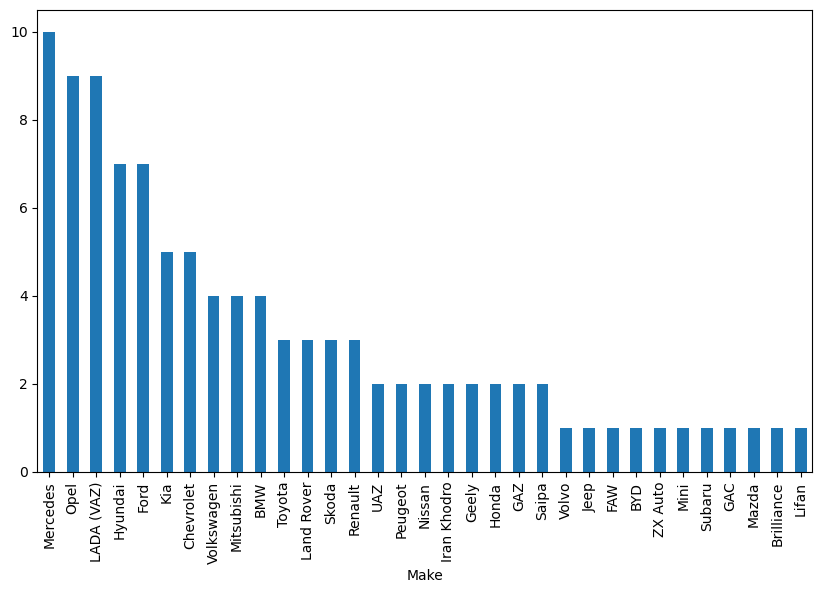

In [614]:
plt.figure(figsize=(10, 6))
damaged_cars['Make'].value_counts().plot(kind = 'bar')

>From the visual, we can see that most of the damaged cars for sale are Mercedes, Opel, Lada (VAZ), Hyundai and Ford.

In [615]:
df = df.drop(columns = ['Damaged','Owners'])

<a id="3.2"></a>
### Duplicate values

In [633]:
df.duplicated().sum()

162

In [635]:
# dropping duplicates
df.drop_duplicates(inplace = True)

 <a id="3"></a>
<p style="background:linear-gradient(135deg,#08659f,#05466e);font-family:'Poppins',sans-serif;color:#F5F5F5;font-size:1.5rem;text-align:center;border-radius:25px;padding:12px 20px;box-shadow:0 4px 15px rgba(0,0,0,0.2);letter-spacing:1px;text-transform:uppercase;"> Exploratory data analysis</p>


In [680]:
df.head()

,City,Price,Make,Model,Year,Body Type,Color,Engine,Kilometrage,Transmission,Drivetrain,Is_New,Number_of_Seats,Condition,Market,Engine(L),Engine_Power(a.g),Fuel_Type
0,Bərdə,8500,GAZ,53,1992,Yük maşını,Yaş Asfalt,4.3 L / 150 a.g. / Benzin,500000,Mexaniki (MT),Arxa,Xeyr,2.0,"Vuruğu yoxdur, rənglənməyib",Rusiya,4.3,150,Benzin
1,Tovuz,8500,Mercedes,C 180,1994,Sedan,Gümüşü,1.8 L / 122 a.g. / Benzin,596890,Avtomat (AT),Arxa,Xeyr,5.0,"Vuruğu yoxdur, rənglənib",Amerika,1.8,122,Benzin
2,Ağdaş,2500,LADA (VAZ),2108,1989,"Hetçbek, 3 qapı",Sarı,1.5 L / 78 a.g. / Benzin,172820,Mexaniki (MT),Ön,Xeyr,5.0,"Vuruğu var, rənglənib",Rusiya,1.5,78,Benzin
3,Sumqayıt,28900,BMW,528,2012,Sedan,Ağ,2.0 L / 245 a.g. / Benzin,152410,Avtomat (AT),Arxa,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Amerika,2.0,245,Benzin
4,Bakı,21500,Hyundai,ix35,2012,"Offroader / SUV, 5 qapı",Ağ,2.0 L / 150 a.g. / Benzin,270000,Avtomat (AT),Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,2.0,150,Benzin
